In [1]:
%run model.ipynb
%run Covid19AntigenDataset.ipynb

Using cpu device
0.8911690863442856
torch.Size([180])


In [2]:
import torch
from torch.utils.data import DataLoader

dataset = Covid19AntigenDataset()

train_size = int(0.9 * dataset.__len__())
test_size = dataset.__len__() - train_size
print(train_size)
print(test_size)

train_set, test_set = torch.utils.data.random_split(dataset, [train_size, test_size])

learning_rate = 1e-4
train_batch_size = 8
test_batch_size = 64
epochs = 20

train_dataloader = DataLoader(train_set, batch_size=train_batch_size, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=test_batch_size, shuffle=True)

model = NeuralNetwork(180)

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


0.8911690863442856
24734
2749


In [3]:
def train_loop(dataloader, model, loss_fn, optimizer):
    loop_loss = 0 
    size = len(dataloader.dataset)
    correct = 0
    print(size)
    
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.float()
        y = y.float()
        pred = model(X)
    
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loop_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    correct /= size
    num_batches = len(dataloader)
    loop_loss /= num_batches
    print(f"Train Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {loop_loss:>8f} \n")
    return (correct, loop_loss)


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.float()
            y = y.float()
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return (correct, test_loss)

In [4]:
epochs = 3
test_losses, train_losses, test_accuracies, train_accuracies = [], [], [], []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_accuracy, train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    test_accuracy, test_loss = test_loop(test_dataloader, model, loss_fn)
    
    test_losses += [test_loss]
    test_accuracies += [test_accuracy]
    train_losses += [train_loss]
    train_accuracies += [train_accuracy]

print("Done!")

Epoch 1
-------------------------------
24734


/Users/dort/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/Users/dort/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/Users/dort/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reducti

Train Error: 
 Accuracy: 89.1%, Avg loss: 0.640121 

Test Error: 
 Accuracy: 89.7%, Avg loss: 0.599841 

Epoch 2
-------------------------------
24734
Train Error: 
 Accuracy: 89.1%, Avg loss: 0.568674 

Test Error: 
 Accuracy: 89.7%, Avg loss: 0.535394 

Epoch 3
-------------------------------
24734
Train Error: 
 Accuracy: 89.1%, Avg loss: 0.512153 

Test Error: 
 Accuracy: 89.7%, Avg loss: 0.483870 

Done!


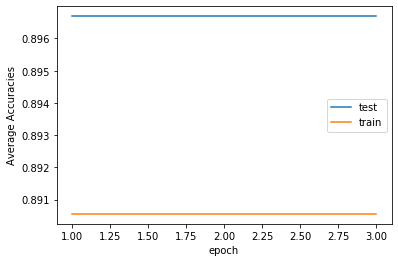

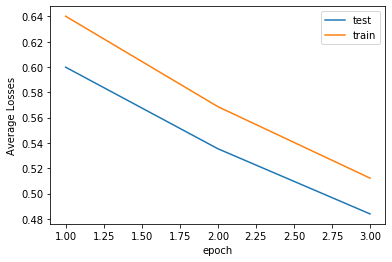

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
x = range(1, epochs +1)
plt.plot(x, test_accuracies, label = "test")
plt.plot(x, train_accuracies, label = "train")
plt.ylabel('Average Accuracies')
plt.xlabel('epoch')
plt.legend()
plt.show()
fig.savefig('accuracies.png')

fig = plt.figure()
plt.plot(x, test_losses, label = "test")
plt.plot(x, train_losses, label = "train")
plt.ylabel('Average Losses')
plt.xlabel('epoch')
plt.legend()
plt.show()
fig.savefig('losses.png')